In [1]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set()

For making different contours from the same chains. 

In [2]:
import numpy as np
import h5py
from chainconsumer import ChainConsumer
from glob import glob
from os import path
from copy import deepcopy
from collections import OrderedDict
from os.path import basename

In [3]:
! ls -ltr ~/des/PearceMCMC/VpeakSHAM_*rmin_*TAB_Zheng_2.hdf5

-rw-r--r-- 1 swmclau2 des 821449515 Sep 14 21:12 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_5.0_TAB_Zheng_2.hdf5
-rw-r--r-- 1 swmclau2 des 833791444 Sep 14 21:42 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_1.0_TAB_Zheng_2.hdf5
-rw-r--r-- 1 swmclau2 des 832274889 Sep 14 21:50 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_TAB_Zheng_2.hdf5
-rw-r--r-- 1 swmclau2 des 768982092 Sep 14 22:31 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_None_TAB_Zheng_2.hdf5


In [4]:
fnames = ['/u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_HOD_2.hdf5',
          '/u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_HSAB_2.hdf5',
          '/u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_CorrAB_3.hdf5'
          ]

Assume all chains run with same true values, only thing that differs is the rmin. 

In [5]:
fnames

['/u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_HOD_2.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_HSAB_2.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_CorrAB_3.hdf5']

In [6]:
if len(fnames)>4:
    _fnames = fnames[:-3]
    _fnames.extend(fnames[-2:])
    fnames = _fnames

In [7]:
fnames

['/u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_HOD_2.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_HSAB_2.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_CorrAB_3.hdf5']

In [8]:
model = path.basename(fnames[0]).split('_')[-2].split('.')[0]
#model = path.basename(fnames[0]).split('_')[-2]#.split('.')[0]

In [9]:
model

'HOD'

In [10]:
f = h5py.File(fnames[1], 'r')

In [11]:
f.attrs.keys()

[u'chain_fixed_params',
 u'cov',
 u'dlogz',
 u'emu_cov_fname',
 u'emu_hps',
 u'emu_type',
 u'fixed_params',
 u'mcmc_type',
 u'nburn',
 u'nlive',
 u'nsteps',
 u'nwalkers',
 u'obs',
 u'param_names',
 u'seed',
 u'sim',
 u'training_file',
 u'true_cov_fname',
 u'true_data_fname']

In [12]:
f.keys()

[u'chain', u'cov', u'data', u'lnprob']

In [13]:
n_walkers = f.attrs['nwalkers']

In [14]:
chain_pnames = list(f.attrs['param_names'])

In [15]:
chain_pnames.extend(['Om', 'S8']) # temporary

In [16]:
sim_info = eval(f.attrs['sim'])
#sim_info = f.attrs['sim']

In [17]:
#gal_type = eval(f.attrs['sim'])['gal_type']
if basename(fnames[0])[:3] == 'HOD' and basename(fnames[0])[4:9] != 'MDPL2':
    gal_type = 'HOD'
else:
    gal_type = 'SHAM'#'HOD'

In [18]:
f.close()

In [19]:
chain_pnames

['ombh2',
 'omch2',
 'w0',
 'ns',
 'H0',
 'Neff',
 'sigma8',
 'mean_occupation_centrals_assembias_param1',
 'logM0',
 'sigma_logM',
 'mean_occupation_satellites_assembias_param1',
 'logM1',
 'alpha',
 'conc_gal_bias',
 'Om',
 'S8']

In [20]:
param_name_dict = {'ombh2': r'$\Omega_b h^2$', 'omch2': r'$\Omega_c h^2$','w0': r'$w_0$','ns': r'$n_s$', \
                   'sigma8': r'$\sigma_8$', 'ln10As':r'$\ln 10^{10} A_s$', 'H0': r'$H_0$','Neff': r'$N_{eff}$',\
               'mean_occupation_centrals_assembias_corr1': r'$\rho_{cen}$',\
                 'mean_occupation_satellites_assembias_corr1':r'$\rho_{sat}$',\
                   'mean_occupation_centrals_assembias_param1': r'$\mathcal{A}_{cen}$',\
                 'mean_occupation_satellites_assembias_param1':r'$\mathcal{A}_{sat}$',\
                   'mean_occupation_centrals_assembias_slope1': r'$\mathcal{B}_{cen}$',\
                 'mean_occupation_satellites_assembias_slope1':r'$\mathcal{B}_{sat}$',\
                   'logM1': r'$\log(M_1)$','logM0': r'$\log(M_0)$',
                   'sigma_logM': r'$\sigma_{\log M }$',
                   'conc_gal_bias': r'$\eta$', 'alpha':r'$\alpha$',
                  'Om': r'$\Omega_m$', 'S8': r'$S_8$'}

In [21]:
bounds_dict = {'H0': (61.69472, 74.76751999999999),
 'Neff': (2.62125, 4.27875),
 'alpha': (0.7, 1.3),
 'conc_gal_bias': (0.5, 2.0),
 'sigma8': (0.65, 1.0), # TODO update
 'logM0': (12.6, 13.6),
 'logM1': (13.7, 14.7),
 'ns': (0.9278462, 0.9974495999999999),
 'ombh2': (0.02066455, 0.02371239),
 'omch2': (0.1012181, 0.13177679999999997),
 'sigma_logM': (0.05, 0.6),
 'ln10As': (3.0, 3.1),
 'w0': (-1.399921, -0.5658486),
 'Om': (0.25, 0.35),
 'S8': (0.7, 1.0),
 #'Om': (0.15, 0.4),
 #'S8': (0.5, 1.1),
 'mean_occupation_centrals_assembias_corr1': (-1.0, 1.0),
 'mean_occupation_satellites_assembias_corr1': (-1.0, 1.0),
 'mean_occupation_centrals_assembias_param1': (-1.0, 1.0),
 'mean_occupation_satellites_assembias_param1': (-1.0, 1.0),
 'mean_occupation_centrals_assembias_slope1': (-3.0, 3.0),
 'mean_occupation_satellites_assembias_slope1': (-3.0, 3.0)}

In [22]:
hod_param_names = []
cosmo_param_names = []

hod_bounds = []
cosmo_bounds = []
cosmo_names = set(['ombh2', 'omch2', 'w0', 'ns', 'sigma8', 'H0', 'Neff', 'ln10As', 'Om', 'S8'])
for pname in chain_pnames:
    if pname in cosmo_names:
        cosmo_param_names.append(param_name_dict[pname])
        cosmo_bounds.append(bounds_dict[pname])
    else:
        hod_param_names.append(param_name_dict[pname])
        hod_bounds.append(bounds_dict[pname])
param_names = deepcopy(cosmo_param_names)
param_names.extend(hod_param_names)

bounds = deepcopy(cosmo_bounds)
bounds.extend(hod_bounds)

In [23]:
c = ChainConsumer()

In [24]:
def modify_chain(chain, param_names):
    new_pnames = ['Om', 'S8']
    h = chain[:,param_names.index('H0')]/100
    
    Omc, Omb = chain[:,param_names.index('omch2')]/(h**2), chain[:,param_names.index('ombh2')]/(h**2)
    Om = Omc+Omb
    
    S8 = chain[:,param_names.index('sigma8')]*np.sqrt(Om/0.3)

    new_chain = np.hstack([chain[:,:7], Om.reshape((-1,1)), S8.reshape((-1,1)), chain[:,7:]])
    param_names.insert(7, new_pnames[0])
    param_names.insert(8, new_pnames[1])

    return new_chain, param_names

In [25]:
n_burn = 10000
global_chain_pnames = []
global_hod_pnames = []
#for name, fname in zip(['wp','ds','wpds'], fnames):
for fname in fnames:
#for fname in [fnames[0], fnames[3]]:
    try:
        f = h5py.File(fname, 'r')

        chain = f['chain'][n_burn*n_walkers:]
        lnprob = f['lnprob'][n_burn*n_walkers:]
        keep_idxs = np.all(chain!=0.0, axis = 1)
        chain = chain[keep_idxs, :]
        lnprob = lnprob[keep_idxs]
    except:
        print 'Error loading', fname
        continue
    

    chain = chain.reshape((-1, n_walkers, chain.shape[1]))
    #print chain.shape
    chain = chain.reshape((-1, chain.shape[2]), order = 'F')
    lnprob = lnprob.reshape((-1, n_walkers)).reshape((-1,), order = 'F')
    
    if np.any(np.isnan(lnprob)) or np.any(~np.isfinite(lnprob)):
        lnprob[np.isnan(lnprob)] = -1e9
        lnprob[~np.isfinite(lnprob)] = -1e9
    #chain = chain[:, 0, :]
    if chain.shape[0] == 0:
        print 'Insufficient samples in', fname
        continue
    
    #name = path.basename(fname).split('_')[-1].split('.')[0]
    name = path.basename(fname).split('_')[-2]#[4][5]
    #name = path.basename(fname).split('_')[0]
    #name = path.basename(fname).split('_')[-4]#[4][5]

    if name == "None":
        name = "0.1"
        
    #name = r"$r_{min} = %s$"%name
    
    hod_param_names = []
    cosmo_param_names = []
    chain_pnames = list(f.attrs['param_names'])
    cosmo_names = set(['ombh2', 'omch2', 'w0', 'ns', 'sigma8', 'H0', 'Neff', 'Om', 'S8'])
    
    chain, chain_pnames = modify_chain(chain, chain_pnames)
    max_steps = 50000
    if chain.shape[0]/n_walkers > max_steps:
        chain = chain[:max_steps*n_walkers]
        lnprob = lnprob[:max_steps*n_walkers]
    
    for pname in chain_pnames:
        if pname in cosmo_names:
            cosmo_param_names.append(param_name_dict[pname])
        else:
            hod_param_names.append(param_name_dict[pname])

    param_names = deepcopy(cosmo_param_names)
    param_names.extend(hod_param_names)
    print fname
    print chain.shape, chain.shape[0]/n_walkers, len(param_names)
    
    
    c.add_chain(chain, parameters=param_names, name = name, walkers = n_walkers,
                posterior = lnprob)
    f.close()

    for cname in chain_pnames:
        if cname not in global_chain_pnames:
            global_chain_pnames.append(cname)
            
    for cname in hod_param_names:
        if cname not in global_hod_pnames:
            global_hod_pnames.append(cname) 
            
chain_pnames = global_chain_pnames
hod_param_names = global_hod_pnames

/u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_HOD_2.hdf5
(12500000, 14) 50000 14
/u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_HSAB_2.hdf5
(12500000, 16) 50000 16
/u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_CorrAB_3.hdf5
(12500000, 16) 50000 16


In [26]:
param_names

['$\\Omega_b h^2$',
 '$\\Omega_c h^2$',
 '$w_0$',
 '$n_s$',
 '$H_0$',
 '$N_{eff}$',
 '$\\sigma_8$',
 '$\\Omega_m$',
 '$S_8$',
 '$\\rho_{cen}$',
 '$\\log(M_0)$',
 '$\\sigma_{\\log M }$',
 '$\\rho_{sat}$',
 '$\\log(M_1)$',
 '$\\alpha$',
 '$\\eta$']

In [27]:
f.close()

In [28]:
MAPs  = c.analysis.get_max_posteriors()#[0]

In [29]:
print [_c.name for _c in c.chains]

['HOD', 'HSAB', 'CorrAB']


In [30]:
MAPs[-2]

{'$H_0$': 68.4153,
 '$N_{eff}$': 3.9321427,
 '$S_8$': 0.8125202,
 '$\\Omega_b h^2$': 0.022737207,
 '$\\Omega_c h^2$': 0.12207984,
 '$\\Omega_m$': 0.30939502,
 '$\\alpha$': 0.86207503,
 '$\\eta$': 0.6222103,
 '$\\log(M_0)$': 13.049979,
 '$\\log(M_1)$': 14.534995,
 '$\\mathcal{A}_{cen}$': 0.050196104,
 '$\\mathcal{A}_{sat}$': -0.75958484,
 '$\\sigma_8$': 0.8000887,
 '$\\sigma_{\\log M }$': 0.5989349,
 '$n_s$': 0.94641185,
 '$w_0$': -1.1489558}

In [31]:
fnames

['/u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_HOD_2.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_HSAB_2.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_CorrAB_3.hdf5']

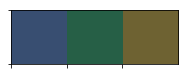

In [32]:
hod_palette = sns.cubehelix_palette(4, start = 2.6, rot = 0.1, gamma =2.5)
hsab_palette = sns.cubehelix_palette(4, start = 2.0, rot = 0.1, gamma = 2.5)
cab_palette = sns.cubehelix_palette(4, start = 0.6, rot = 0.1, gamma = 2.5)
corrab_palette = sns.cubehelix_palette(4, start = 1.2, rot = 0.1, gamma = 2.0)

palette = [hod_palette[1], hsab_palette[1], corrab_palette[1]]
sns.palplot(palette)

In [33]:
def color_to_hex(color):
    return np.array(color)#*255

In [34]:
n_params = chain.shape[1] if len(chain.shape) > 1 else 1

In [35]:
hod_idxs = np.array(range(len(cosmo_param_names), len(cosmo_param_names)+len(hod_param_names)-1)) #skip eta
cosmo_idxs = np.array(range(len(cosmo_param_names)))

In [36]:
cosmo_param_names

['$\\Omega_b h^2$',
 '$\\Omega_c h^2$',
 '$w_0$',
 '$n_s$',
 '$H_0$',
 '$N_{eff}$',
 '$\\sigma_8$',
 '$\\Omega_m$',
 '$S_8$']

In [37]:
hod_param_names

['$\\log(M_1)$',
 '$\\log(M_0)$',
 '$\\sigma_{\\log M }$',
 '$\\alpha$',
 '$\\eta$',
 '$\\mathcal{A}_{cen}$',
 '$\\mathcal{A}_{sat}$',
 '$\\rho_{cen}$',
 '$\\rho_{sat}$']

In [38]:
gal_type

'SHAM'

In [39]:
if gal_type == 'HOD':
    print 'A'
    from pearce.mocks import cat_dict
    cosmo_params = {'simname': sim_info['simname'], 'boxno': sim_info['sim_hps']['boxno'],\
                    'realization': sim_info['sim_hps']['realization'], 'scale_factors':[sim_info['scale_factor']],\
                    'system': 'ki-ls'}
    #cosmo_params = {'simname': 'testbox', 'boxno': 1,\
    #                'realization':1, 'scale_factors':[1.0],\
    #                'system': 'ki-ls'}
    cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!
    
    cpv = cat._get_cosmo_param_names_vals()

    cat_val_dict =  {key: val for key, val in zip(cpv[0], cpv[1])}

    cosmo_true_vals = [cat_val_dict[pn] for pn in chain_pnames if pn in cat_val_dict]
    
    Om = (cat_val_dict['ombh2']+cat_val_dict['omch2'])/((cat_val_dict['H0']/100)**2)
    S8 = cat_val_dict['sigma8']*np.sqrt(Om/0.3)
    cosmo_true_vals.extend([Om, S8])
    
    hod_params = {'alpha': 1.083, 'conc_gal_bias': 1.0, 'logM0': 13.2,'logM1': 14.2, 'sigma_logM': 0.2}#sim_info['hod_params']
    hod_true_vals = [hod_params[key] for key in chain_pnames if key in hod_params]
    
    if model!= 'HOD':
        hod_true_vals.extend([0, 0])
        if model == 'CAB':
            hod_true_vals.extend([0,0])
else: #SHAM, etc on MDPL2
    print 'B'
    # multidark planck2
    #cosmo_true_vals = np.array([0.0223, 0.1188, -1, 0.9667, 3.047, \
    #                            0.6774*100, 3.046]) #darksky
    
    h = 0.6777
    #cosmo_pnames = ['ombh2', 'omch2', 'w0', 'ns', 'H0', 'Neff', 'sigma8', 'Om', 'S8']
    #cosmo_true_vals = np.array([0.048206*h**2, 0.307115*h**2- 0.048206*h**2,\
    #                            -1, 0.9667, \
    #                            h*100, 3.046, 0.8228, ]) #mdpl2
    cosmo_true_vals = np.array([0.048206*h**2, 0.2589*h**2,\
                                -1, 0.9667, \
                                h*100, 3.046, 0.8228, 0.3089,\
                                0.8228*np.sqrt(0.3089/0.3) ]) #mdpl2
    hod_true_vals = np.array([np.inf for p in hod_param_names])

B


In [40]:
cosmo_true_vals

array([ 2.21399210e-02,  1.18906890e-01, -1.00000000e+00,  9.66700000e-01,
        6.77700000e+01,  3.04600000e+00,  8.22800000e-01,  3.08900000e-01,
        8.34915666e-01])

In [41]:
hod_param_names

['$\\log(M_1)$',
 '$\\log(M_0)$',
 '$\\sigma_{\\log M }$',
 '$\\alpha$',
 '$\\eta$',
 '$\\mathcal{A}_{cen}$',
 '$\\mathcal{A}_{sat}$',
 '$\\rho_{cen}$',
 '$\\rho_{sat}$']

In [42]:
# Enforce a consistent order for the plots
#if gal_type == 'HOD':
    
plot_hod_param_names = ['$\\sigma_{\\log M }$', '$\\log(M_0)$', '$\\log(M_1)$', '$\\alpha$', '$\\eta$']
plot_hod_true_vals = [0.2, 13.2, 14.2, 1.083, 1.0]
#plot_hod_true_vals = [0.55, 13.2, 14.5, 0.95, 1.0]

plot_hod_bounds = [(0.05, 0.6), (12.6, 13.6), (13.7, 14.7), (0.7, 1.3), (0.5, 2.0)]

ab_param_names = [r'$\mathcal{A}_{%s}$', r'$\mathcal{B}_{%s}$', r'$\rho_{%s}$']
ab_true_vals = [0.0, np.inf,0.0]
for abpn, hodtv in zip(ab_param_names, ab_true_vals):
    if abpn%'cen' in hod_param_names: # this pname is in the model
        if 'B' in abpn:
            plot_hod_true_vals.extend([np.inf, np.inf])
            plot_hod_param_names.extend([abpn%'cen', abpn%'sat'])

            continue
        for gal_type in ['cen', 'sat']:
            plot_hod_param_names.append(abpn%gal_type)#

            if gal_type == 'cen':
                plot_hod_true_vals.append(np.inf)#0.0)
            else:
                plot_hod_true_vals.append(np.inf)#0.0)

            plot_hod_bounds.append((-1.0, 1.0))

#for phpn in plot_hod_param_names:
#    i = hod_param_names.index(phpn)
#    print phpn, i, hod_true_vals[i]
#    plot_hod_true_vals.append(hod_true_vals[i])
#    plot_hod_bounds.append(hod_bounds[i])


In [43]:
c.configure(colors = [color_to_hex(p) for p in palette], shade = True, 
            shade_alpha=0.2, shade_gradient=1.0,
            diagonal_tick_labels=True, tick_font_size=8, label_font_size=25, \
            max_ticks=8, plot_hists=True)#, statistics='cumulative')

In [44]:
from copy import deepcopy
true_vals  = list(deepcopy(cosmo_true_vals))
true_vals.extend(plot_hod_true_vals)

In [45]:
true_vals

[0.022139921041739997,
 0.118906890381,
 -1.0,
 0.9667,
 67.77,
 3.046,
 0.8228,
 0.3089,
 0.8349156655535137,
 0.2,
 13.2,
 14.2,
 1.083,
 1.0,
 inf,
 inf,
 inf,
 inf]

In [46]:
plot_param_names = list(deepcopy(cosmo_param_names))
plot_param_names.extend(plot_hod_param_names)

In [47]:
plot_param_bounds = list(deepcopy(cosmo_bounds))
plot_param_bounds.extend(plot_hod_bounds)

In [48]:
plot_param_names

['$\\Omega_b h^2$',
 '$\\Omega_c h^2$',
 '$w_0$',
 '$n_s$',
 '$H_0$',
 '$N_{eff}$',
 '$\\sigma_8$',
 '$\\Omega_m$',
 '$S_8$',
 '$\\sigma_{\\log M }$',
 '$\\log(M_0)$',
 '$\\log(M_1)$',
 '$\\alpha$',
 '$\\eta$',
 '$\\mathcal{A}_{cen}$',
 '$\\mathcal{A}_{sat}$',
 '$\\rho_{cen}$',
 '$\\rho_{sat}$']

In [49]:
# TODO can choose these by galaxy model 
# TODO combine multiple chains? 
#summary_idxs = [1, 4]
#summary_idxs = [7,6,8,4,13]
#summary_idxs = [7,6, 8,4,11, 13]
#summary_idxs=[7,8,4,]
summary_idxs=[7,8,14,15, 16,17]
if len(plot_param_names) > 14:
    #summary_idxs.extend([14,15])#,18,19])
    #summary_idxs.extend([11,12])
    pass


summary_pnames = [plot_param_names[i] for i in summary_idxs]
summary_truths = [true_vals[i] for i in summary_idxs]
summary_bounds = [plot_param_bounds[i] for i in summary_idxs]

In [50]:
split_fname = basename(fnames[-1]).split('_')
mock_name = split_fname[0]
model_name = split_fname[-2].split('.')[0]

if mock_name == 'HOD':
    mock_name = 'Std. HOD'
    
elif mock_name == 'VpeakSHAM':
    mock_name = 'SHAM'
elif mock_name == 'UniverseMachine':
    mock_name = 'UM'
    
if model_name == 'HOD':
    model_name = 'Std. HOD'
    
elif model_name == 'conc':
    model_name = r'HSAB $c_{nfw}$'
    
elif model_name == 'Zheng':
    model_name = 'TAB Zheng'

In [51]:
mock_name, model_name

('SHAM', 'CorrAB')

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


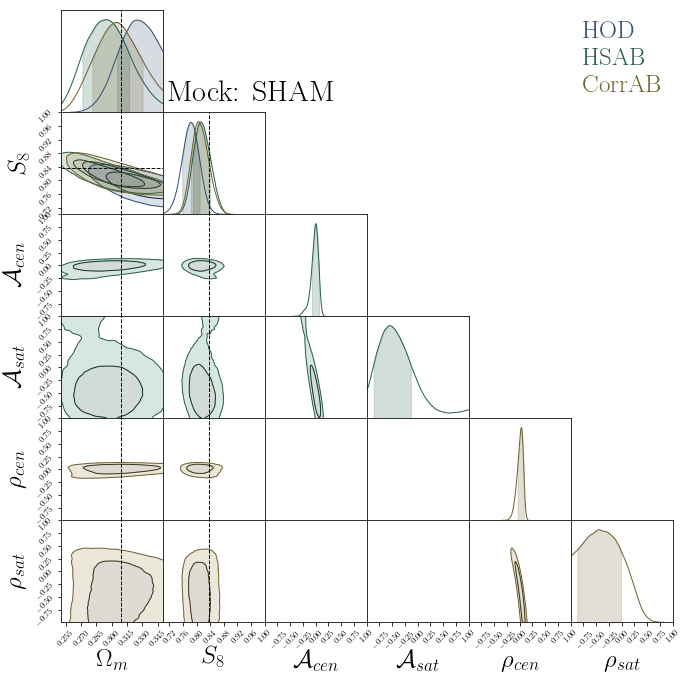

In [54]:
fig = c.plotter.plot(figsize='PAGE', parameters =summary_pnames\
                                    , truth=summary_truths, extents=summary_bounds) 
fig.patch.set_facecolor('white')
#fig.axes[1].text(0.05, 0.1, 'Mock: %s\n Model: %s'%(mock_name,model_name),
#                 fontdict={'fontsize':30})
fig.axes[1].text(0.05, 0.1, 'Mock: %s'%(mock_name),
                 fontdict={'fontsize':30})
fig.savefig('%s_ab_deg.pdf'%(mock_name), format = 'pdf', bbox_inches='tight')
fig.show()

In [53]:
for pname in summary_pnames:
    print pname,'\t',
print
print '*'*20

for MAP in MAPs:
    for pname in summary_pnames:
        print MAP[pname],'\t',
    print 
print '*'*20
for st in summary_truths:
    print '%.4f'%st,'\t'*2,

$\Omega_m$ 	$S_8$ 	$\mathcal{A}_{cen}$ 	$\mathcal{A}_{sat}$ 	$\rho_{cen}$ 	$\rho_{sat}$ 	
********************
0.3147892 	0.810103 	

KeyError: '$\\mathcal{A}_{cen}$'

In [ ]:
MAP = [MAPs[0][pname] for pname in summary_pnames]

In [ ]:
summary_names = ['Om','S8','H0']
Om = 0.3089
S8 = 0.8228*np.sqrt(0.3089/0.3)
h = 0.6777
H0=h*100
true_vals_dict = dict(zip(summary_names, [Om, S8, H0]))

true_point = np.array([true_vals_dict[name] for name in summary_names])

In [ ]:
from numpy.random import multivariate_normal

In [ ]:
from scipy.linalg import inv

for i,chain in enumerate(c.chains[:4]):
    print chain.name
    
    names, cov = c.analysis.get_covariance(chain.name)
    #print cov
    idxs = np.array([names.index(sp) for sp in summary_pnames])
    cov = cov[idxs][:,idxs]
    inv_cov = inv(cov)

    #max_dict = c.analysis.get_max_posteriors()[i]#chain.name)
    #max_point = np.array([max_dict[name] for name in summary_pnames])
    max_dict = c.analysis.get_summary(chains = chain.name)
    max_point = np.array([max_dict[name][1] for name in summary_pnames])
    print true_point
    print max_point
    print np.sqrt(np.diag(cov))
    delta = true_point-max_point
    d2 = delta.T.dot(inv_cov.dot(delta))
    print np.sqrt(d2)
    true_d = np.sqrt(d2)
    
    all_points = c.chains[i].chain[:,idxs]
    all_delta = (all_points-max_point)#[:1000]
    all_d2 = np.array([d.T.dot(inv_cov.dot(d)) for d in all_delta])
    all_d = np.sqrt(all_d2)
    print 'Sorta p value:', np.sum(true_d<all_d)*1.0/all_d.shape[0]

    posterior_samples = multivariate_normal(max_point, cov, 25000)
    name = '%d Fit'%i
    c.add_chain(posterior_samples, parameters=summary_pnames, name = name)
    
    fig = c.plotter.plot(chains = [0+i,4+i], figsize='PAGE', parameters =summary_pnames\
                                    , truth=summary_truths, extents=summary_bounds)
    plt.show()


In [ ]:
c.chains[0].chain.shape

In [ ]:
def lnlike(theta, param_names, fixed_params, r_bin_centers, y, combined_inv_cov):

    param_dict = dict(izip(param_names, theta))
    param_dict.update(fixed_params)

    emu_preds = []
    for _emu, rbc in izip(_emus, r_bin_centers):
        y_bar = _emu.emulate_wrt_r(param_dict, rbc)[0]

        emu_preds.append(10**y_bar)
        #delta = y_bar - y
        #chi2 -= np.dot(delta, np.dot(combined_inv_cov, delta))

    emu_pred = np.hstack(emu_preds)

    delta = emu_pred - y
    #print delta
    return - np.dot(delta, np.dot(combined_inv_cov, delta))


In [ ]:
c.chains[0].name.split()

In [ ]:
deltas = []
rmins = []
for chain in c.chains:
    summary = c.analysis.get_parameter_summary(chain, r'$S_8$')
    delta = summary[2]-summary[0]
    deltas.append(delta)
    rmin = chain.name.split()[-1][:-1]
    rmins.append(float(rmin))
    print rmin, delta

In [ ]:
true_s8 = 0.8349

In [ ]:
plt.plot(np.array(rmins), np.array(deltas)/true_s8, color = 'b')
plt.xscale('log')
plt.ylabel(r'$\Delta S_8/S_8$')
plt.xlabel(r'$r_{min}$ [Mpc/h]')